

# Project: Database_No_show_appointments

## Table of Contents



## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

question:

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

I used head and tail for my dataset to quick look at some of the first data and last data in my dataset. it helps me
to have general view about my data


In [2]:
data=pd.read_csv("KaggleV2-May-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


in the next part, we need to know about number of rows and columns in this dataset. that is why I use shape in following line:

In [3]:
data.shape

(110527, 14)

by using data.info() I can understand type of my data and number of missing data
as we see in my this dataset, we do not have any missing data. the number of Non-Null in each field is equal to total rows

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


this is the time that we need to check duplicated rows
if we find any duplicated rows, we remove them by data.drop_duplicates()

In [37]:
data.duplicated().sum()

0

like missing value, we do not have any duplicated values

when I used data.described() to take a look at the general function of whole fields, I understood that minimum age is -1 and
this age could not be happened. I need to check it out more. also, maximum age is a little suspicious and need to consider
for this perpose. I need to use boxplot to see some of outlier data in Age field

In [7]:
data.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


we need to explore some of outlier data

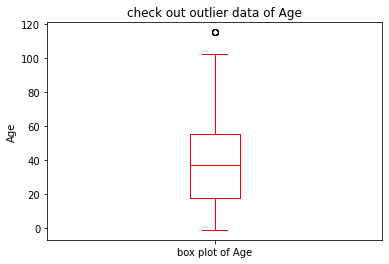

In [24]:
data["Age"].plot.box(label="box plot of Age",color="r")
plt.ylabel("Age")
plt.title("check out outlier data of Age")
plt.show()
min1,Q1,Q2,Q3,max1 = data.Age.quantile([0,0.25,0.5,0.75,1])
min1,Q1,Q2,Q3,max1
d1=Q3-Q1
x1=Q1-1.5*d1
x2=Q3+1.5*d1

values of lower than x1 and upper than x2 are outliers
because of age less than 0 is illogical, we adjusted the botton line zero.

In [10]:
outlier_rows=data[np.logical_or(data.Age>=x2,data.Age<0)]
outlier_rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


6 rows are about outlier data, we need to remove them from dataset:

In [11]:
data.drop(data.index[np.logical_or(data.Age>=x2,data.Age<0)],inplace=True)

to confirm that I droped right, check it with shape:

In [12]:
data.shape

(110521, 14)


## Exploratory Data Analysis



### Research Question 1 (what properties of patients are important to predict they will show up or not??)

first of all we need to use mask for Yes and No in "No-show" field to write program better

In [6]:
not_show=data["No-show"]=="Yes"
show=data["No-show"]=="No"

first of all we want to analysis Age of patients. we intrested to know average of patients age who show up against 
aveage of patients age who not show up

In [7]:
data["Age"][not_show].mean(),data["Age"][show].mean()

(34.31766656212196, 37.790064393252315)

mean of patients age who show up is more than alittle petients not show up

we can draw histogram for age in each group:

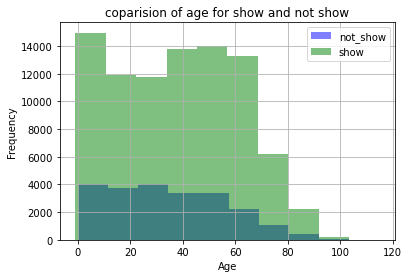

In [25]:
data.Age[not_show].hist(alpha=0.5,color="b",label="not_show")
data.Age[show].hist(alpha=0.5,color="g",label="show")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("coparision of age for show and not show")
plt.legend()
plt.show()

in the next step, we are interested in analizing of trend of Gender can be changed from show to not show
in other words, we want to know for example number of men increase from show up to not show up or not

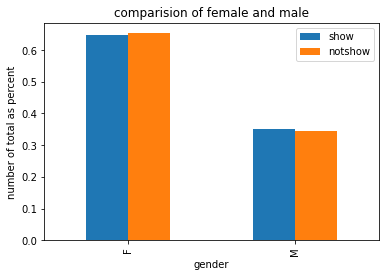

In [26]:
total_show=data[show].Age.count()
total_notshow=data[not_show].Age.count()
percent_show=data[show].groupby("Gender").count().Age/total_show
percent_notshow=data[not_show].groupby("Gender").count().Age/total_notshow
percent_notshow
pd.DataFrame({"show":percent_show,"notshow":percent_notshow},index=["F","M"]).plot(kind="bar")
plt.xlabel("gender")
plt.ylabel("number of total as percent")
plt.title("comparision of female and male")
plt.show()

this chart illustrates percent of female is increased from show to not show, conversely for male is decreased. thus female
have more effect for the patients who not show up

effect of Scholarship on showing up:

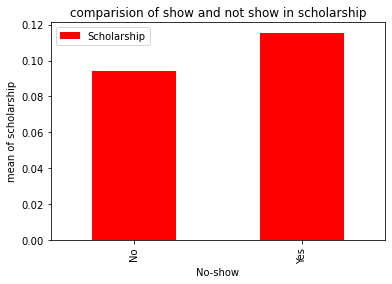

In [28]:
data.groupby("No-show").mean()["Scholarship"].plot.bar(color="r",label="Scholarship");
plt.legend()
plt.ylabel("mean of scholarship")
plt.title("comparision of show and not show in scholarship")
plt.show()

this chart indicates patients who are not show up,
more enrolled in Brasilian welfare program

at this time we need to focus of these field: "Hipertension","Diabetes","Alcoholism","Handcap"

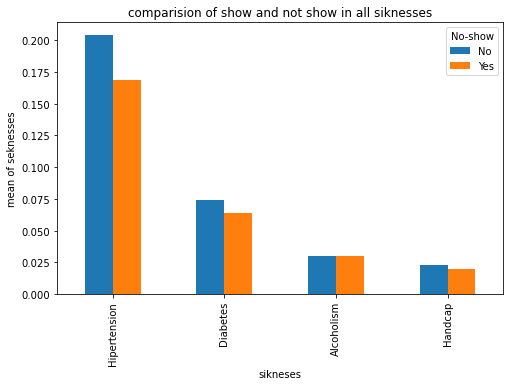

In [31]:
d1=data.groupby("No-show").mean()[["Hipertension","Diabetes","Alcoholism","Handcap"]].round(3)
pd.DataFrame(d1.values.T,index=d1.columns,columns=d1.index).plot.bar(figsize=(8,5));
plt.xlabel("sikneses")
plt.ylabel("mean of seknesses")
plt.title("comparision of show and not show in all siknesses")
plt.show()

 in this chart we can easily compare any sikness in two state of show and not show up. the average of patients who
 have Alcoholism is same average of patients who not show up. but for other three sikness this average is decreased
 from patients who show up to not show up

the next step, we need to consider proccessing of SMS

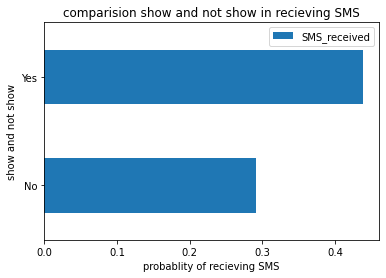

In [32]:
data.groupby("No-show").mean()["SMS_received"].plot.barh(label="SMS_received")
plt.xlabel("probablity of recieving SMS")
plt.ylabel("show and not show")
plt.legend()
plt.title("comparision show and not show in recieving SMS")
plt.show()

this chart shows us people who not show up received SMS more than people show up
thus receiving SMS could not be useful action to inform them about their appoinment

In [15]:
d2=data.groupby(["No-show","Gender"]).mean()["SMS_received"]
d2

No-show  Gender
No       F         0.305384
         M         0.265358
Yes      F         0.460463
         M         0.396634
Name: SMS_received, dtype: float64

prior report illustrates average of receving SMS in female people who not show up is more than others

As we know ‘Neighborhood’ indicates the location of the hospital
we have lots of locations. we want to compare number of patients who show up against patients who are not show up
in each location to know which locations patients who not show up increased (because of the number of location is a lot,
we analyse for loctions where have at least 400 patients)

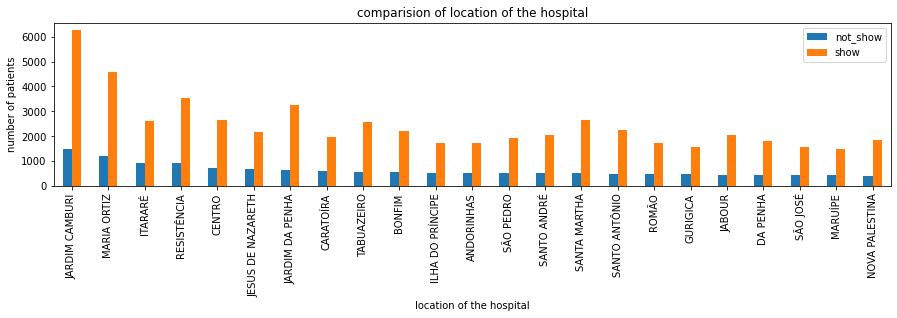

In [33]:
d2=data["Neighbourhood"][not_show].value_counts()[data["Neighbourhood"][not_show].value_counts()>400]
d0=data["Neighbourhood"][show].value_counts()
d1=d0[d2.index]

pd.DataFrame({"not_show":d2,"show":d1},index=d2.index).plot.bar(figsize=(15,3))
plt.legend()
plt.xlabel("location of the hospital")
plt.ylabel("number of patients")
plt.title("comparision of location of the hospital")
plt.show()

as we see in this chart, we should to find some locations that patients who show up increased from one location to another,
while, patients who not show up decreased in this situatuion. for example from JESUD DE NAZARETH to JARDIM DA PENHA

finally, we need to check out duration of time between schedule time and appointment time. it seems for one patient that happen
a long duration time between schedule and appointment time, he does not show up. we need to consider
first we change format of these columns from string to timestamp
after that we calculate difference them. finally we get totally hours between schedule time and appointment time
these value could be added to dataframe to get new report using it.

In [18]:
data["ScheduledDay"]=data["ScheduledDay"].apply(lambda x: pd.to_datetime(x))
data["AppointmentDay"]=data["AppointmentDay"].apply(lambda x: pd.to_datetime(x))
data["hours_diff"]=(data["ScheduledDay"]-data["AppointmentDay"]).apply(lambda diff: abs(diff.days*24+int(str(diff)[-8:-6])))

we need to check to confirm that this field added or not

In [19]:
data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,hours_diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16


In [20]:
data.groupby("No-show").mean()["hours_diff"]

No-show
No     207.943871
Yes    370.476634
Name: hours_diff, dtype: float64

by this value, we understand, when calculates duration between scheduled date and appointment date by hours, patients would prefer to not show up if this duration takes a long time.
thus we can just consider patients who those dates are close together (schedule date and appointment date)

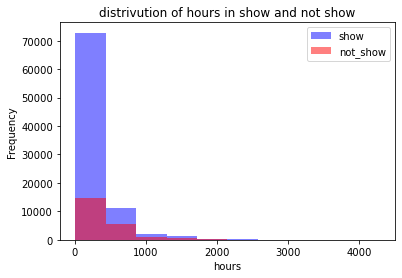

In [35]:
data["hours_diff"][show].hist(label="show",color="b",alpha=0.5)
data["hours_diff"][not_show].hist(label="not_show",color="r",alpha=0.5)
plt.grid(False)
plt.legend()
plt.title("distrivution of hours in show and not show")
plt.xlabel("hours")
plt.ylabel("Frequency")
data["hours_diff"][not_show].count()
plt.show()

by this top graph, hours around 0 to 400 between schedule date and appointment date for both show up and not show up
is really alot and they gradually decreased 

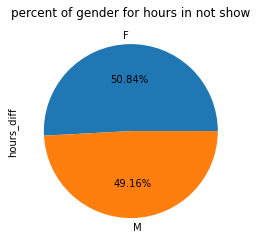

In [36]:
data[not_show].groupby("Gender").mean()["hours_diff"].plot(kind="pie",autopct="%1.2f%%");
plt.title("percent of gender for hours in not show")
plt.show()

this chart displays that hours between schedule date and appointment date for female who not show up are more than 
male who are not show up

## Conclusions

1. Age of patients who show and patients not show are really close together and there is no big difference between them
2. number of female and male from show up state to no show up have a little changed
3. there is big difference between patients who received SMS and show up versus patients received SMS and not show up
4. patients who have desease ("Hipertension","Diabetes","Handcap") are more likely show up against not show up
5. there is high proportion of percentage (upper than 75%) in average of duration between schedule date and appointment date for
   patients who not show up against show up


# limitation

## there are some limitation on this dataset:

1. most of field in this dataset are categorical and we can not use some calculation like descriptive statistical
2. because of this dataset does not have anough numeric field, we do not find appropriate correlation that lead to regression